## Starting a Coffee Shop Business

<b>Problem Statement:</b> A client wants to open his or her coffee shop in Toronto.Hence he wants to know the most conducive location for starting a cofe business in Toronto City.

### Methodlogies:
To ensure the best location, we need to know the area which has lesser crime rate, is good for busines, where footfall is also high.Hence the important question that need to be asked willl be:
1. Which are the safest neighborhood?
2. Which is the neighborhood which has highest footfall?
3. How many cafes exist?
4. What is the most popular venue?

<b>Goal</b>: The goal is to figure out the best locations for opening up a new coffee shop in Toronto City that meets the criteria.

## Data

- __1st Data__: https://tinyurl.com/vehicle-foot-traffic <br>
The most updated record of traffic signal vehicle and pedestrian volumes in Toronto City. 


- __2nd Data__: https://tinyurl.com/toronto-mci <br>
The most updated record of crime incidents reported in Toronto City provided by Toronto Police Services.


- __3rd Data__: https://tinyurl.com/toronto-postal-code <br>
The list of Toronto neighborhoods represented by postal codes and their boroughs. 


- __4th Data__: https://developer.foursquare.com/ <br>
The popular or most common venues of a given neighborhood in Toronto. 

## EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

### Data1: Vehicle and Foot Traffic

- This data consists of 2280 rows and 11 columns.The rows represent the intersection that each main road has. The data is typically collected between 7:30 am to 6:00 pm at interections where there are traffic signals. Each signal holds vehicle and pedestrian volumes data, along with there coordinates.
- We will be using the cols : __Main__, __8 Peak Hr Pedestrian Volume__, __8 Peak Hr Vehicle Volume__, __Lattitude__, and __Longitude__. We will be using these features to diagnose busiest main roads in city.

The first time we open it, we realize that the column Main is the the main street name, and the same name appears several time indicating it contains intersections. 

In [2]:
ft_df = pd.read_excel('dataset/traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx')
ft_df.head()

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,2017-06-21,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,2016-09-17,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,2016-11-08,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,2015-12-08,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,2016-09-17,14487,3368


In [3]:
ft_df.shape

(2280, 11)

In [4]:
ft_df['Main'].value_counts()

YONGE ST          69
BATHURST ST       56
DUNDAS ST W       50
BLOOR ST W        49
SHEPPARD AVE E    48
                  ..
HALLAM ST          1
CHAPLIN CRES       1
QUEENS PARK        1
DREWRY AVE         1
ZOO RD             1
Name: Main, Length: 248, dtype: int64

In [5]:
ft_main = ft_df.groupby(by='Main')[['8 Peak Hr Pedestrian Volume','8 Peak Hr Vehicle Volume', 'Latitude', 'Longitude']].mean().sort_values(by='8 Peak Hr Pedestrian Volume', ascending=False).reset_index()
ft_main.head()

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


In [6]:
ft_main.describe()

,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
count,248.000000,248.000000,248.000000,248.000000
mean,1855.100736,11274.239194,43.710040,-79.395862
std,3190.819880,5193.129205,0.056145,0.102267
min,0.000000,1081.000000,43.603757,-79.622225
25%,343.500000,7403.750000,43.660016,-79.472370
50%,675.000000,10466.433824,43.703423,-79.390913
75%,1653.678571,13938.031250,43.761615,-79.330196
max,23335.000000,29797.428571,43.825259,-79.140419


- Avg Pedestrian: 1855.100.
- Avg Vehicle: 11274.2391. 

In [7]:
pd_mean = ft_main['8 Peak Hr Pedestrian Volume'].mean()
vh_mean = ft_main['8 Peak Hr Vehicle Volume'].mean()

ft_main_top = ft_main[(ft_main['8 Peak Hr Pedestrian Volume']>pd_mean) | (ft_main['8 Peak Hr Vehicle Volume']>vh_mean)].reset_index()
ft_main_top.drop(columns='index', inplace=True)
ft_main_top.head()

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


In [8]:
ft_main_top.shape

(132, 5)

In [9]:
address = 'Toronto, Ontario'

#define a unique user_agent
geolocator = Nominatim(user_agent='toronto_explorer')

#retrieve Toronto Coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [10]:
#create the map
ft_map_toronto = folium.Map(location=[latitude,longitude],zoom_starts=10)

#add markers to map
for lat,long,mainroad,pedes,vehic in zip(ft_main_top['Latitude'], ft_main_top['Longitude'], ft_main_top['Main'], ft_main_top['8 Peak Hr Pedestrian Volume'], ft_main_top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,long],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(ft_map_toronto)
ft_map_toronto

### Crime Statistics
- We are now gonna analyze the crime stats data from 2014 to 2019. It is giving us around 206435 crime incidents segments by police division, neighborhoodand major crime indicators(mci). Toronto police have divided major crimes into 5 categories ('Assault', 'Break and Enter', 'Robbery', 'Theft Over',
'Auto Theft') scattered to 17 divisions and 140 listed neighborhoods.

In [11]:
mci_df = pd.read_csv('dataset/MCI_2014_to_2019.csv')
mci_df.drop( columns=['X', 'Y', 'Index_', 'event_unique_id', 'ucr_code', 'ucr_ext', 'ObjectId'], inplace=True)
temp = mci_df['reportedyear']
mci_df = mci_df[[column for column in mci_df.columns if column.startswith('occ') is False and column.startswith('rep') is False]]
mci_df['reportedyear'] = temp
mci_df.head()

,premisetype,offence,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
1,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
2,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
3,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
4,Commercial,B&E,Break and Enter,D14,79,University (79),43.665390,-79.410,2014


In [12]:
mci_df.shape

(206435, 9)

In [13]:
mci_df['reportedyear'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

In [14]:
mci_df['MCI'].unique()

array(['Assault', 'Break and Enter', 'Robbery', 'Theft Over',
       'Auto Theft'], dtype=object)

In [15]:
len(mci_df['Division'].unique())

17

In [16]:
len(mci_df['Neighbourhood'].unique())

140

- We are going to group the data based on the divisions instead of neighbourhood(Hood_Id). Thiswill give us insight on how to select the safest borough and neighbourhood.

In [17]:
mci_divison = mci_df.groupby('Division').count().sort_values(by='offence',ascending=False).reset_index()
mci_divison.head()

,Division,premisetype,offence,MCI,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,D51,16944,16944,16944,16944,16944,16944,16944,16944
1,D41,15675,15675,15675,15675,15675,15675,15675,15675
2,D43,15652,15652,15652,15652,15652,15652,15652,15652
3,D32,15377,15377,15377,15377,15377,15377,15377,15377
4,D14,15202,15202,15202,15202,15202,15202,15202,15202


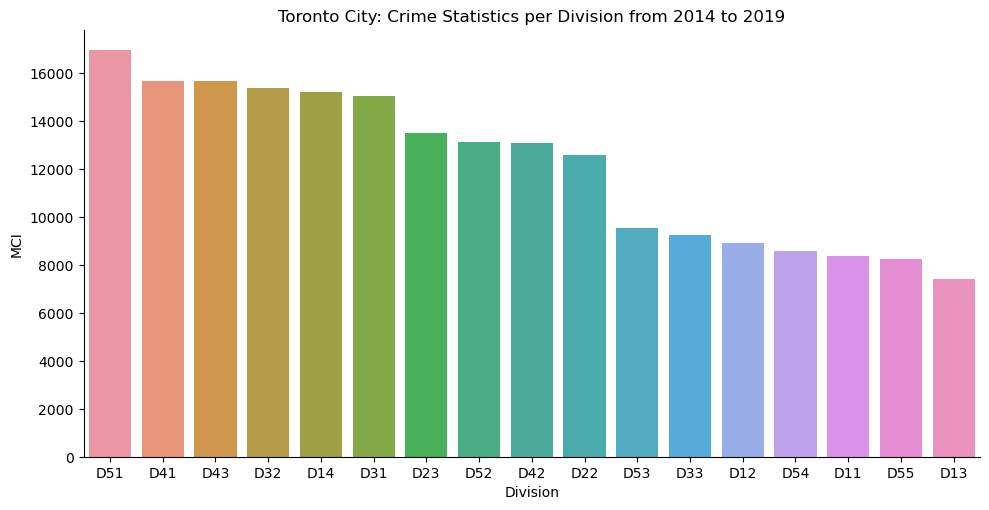

In [18]:
g = sns.catplot(data = mci_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division from 2014 to 2019')
plt.show()

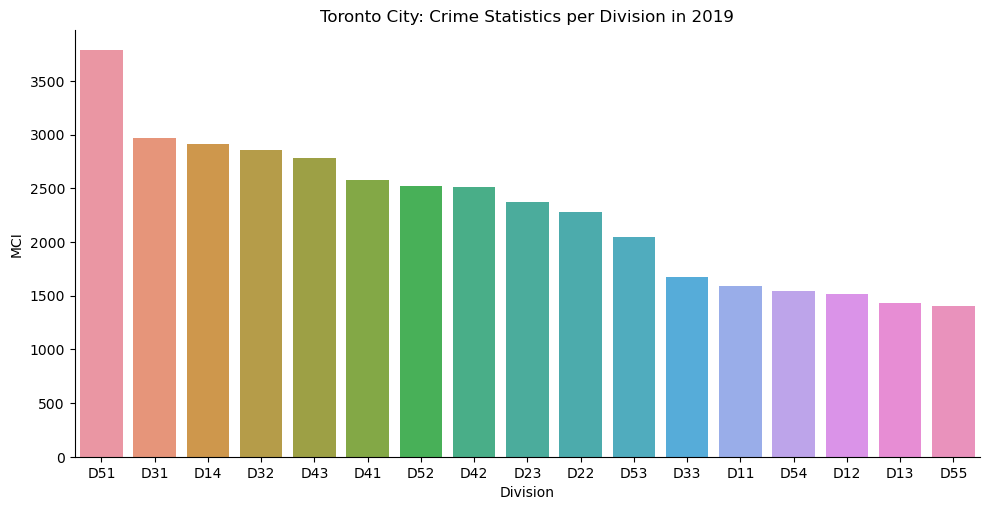

In [19]:
mci_2019 = mci_df[mci_df['reportedyear']==2019]
mci_2019_divison = mci_2019.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_2019_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division in 2019')
plt.show()

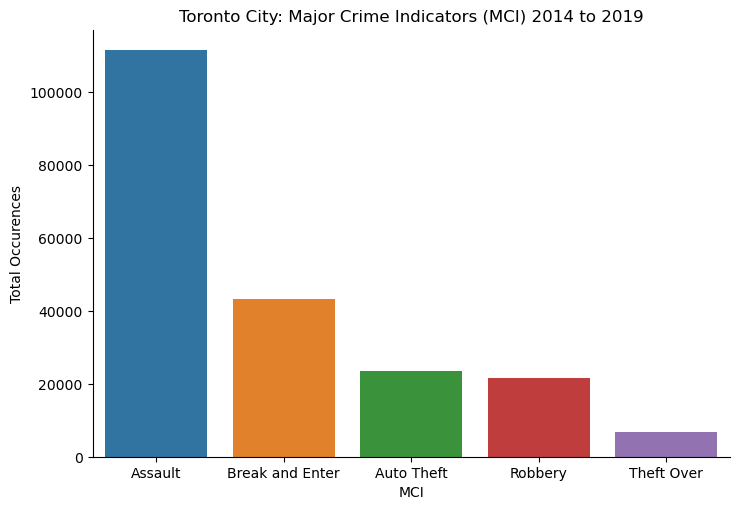

In [20]:
mci_group = mci_df.groupby(by='MCI').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_group, x='MCI', y='offence', kind='bar', aspect=1.5)
g.set(title='Toronto City: Major Crime Indicators (MCI) 2014 to 2019', ylabel='Total Occurences')
plt.show()

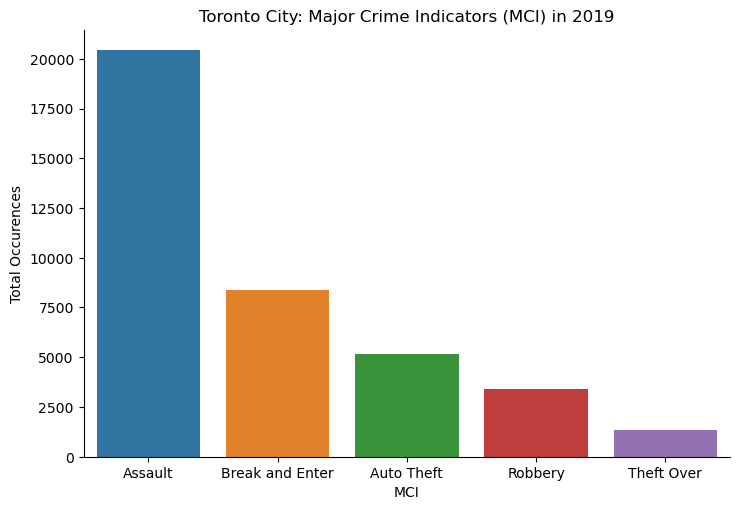

In [21]:
mci_2019_group = mci_2019.groupby(by='MCI').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_2019_group, x='MCI', y='offence', kind='bar', aspect=1.5)
g.set(title='Toronto City: Major Crime Indicators (MCI) in 2019', ylabel='Total Occurences')
plt.show()

Among the 5 MCI,<B>Assault incidents</B> are still number 1 occurred. During the period several divisions are consistent about their crime rates.

1. High Crime Rates (D51, D43, D41, D32, D31, D14)
2. Middle Crime Rates (D52, D42, D23, D22)
3. Low Crime Rates (D55, D54, D53, D33, D13, D12, D11)

Finally, to pick the area of interest, the candidates are expected to be:
- safe - having low crime rates
- lively - crowded by people, vehicles, and easy to access
- close to downtown.

Therefore, the divisions qualified are D55, D54, D53, and D13. Referring to Toronto Police Service Wikipedia [6], these divisions cover:
1. Central Toronto (D53)
2. East York (D53, D54,D 55)
3. York (D13)

### Neighborhood Analysis
Lastly, we load the 3rd data source and preprocess it to be a neighborhood data frame in part1_Web_Scraping.ipynb and Part2_Coordinate_Retrieval.ipynb. It contains 103 postal codes, 10 boroughs, neighborhood names inside each borough, and their coordinates. Since we are interested in neighborhoods inside Central Toronto, East York, and York boroughs only, we will filter the dataframe. This results in having 3 boroughs and 19 neighborhoods based on postal code coordinates.

In [22]:
toronto_df = pd.read_csv('dataset/toronto_poscode_latlng.csv')
toronto_df.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


In [23]:
toronto_df.shape

(103, 5)

- We are gonna filter out the neighborhoods from this data. Since we found out from the above data that division D55, D54, D53, and D13 are safer. There the neighborhood that comes under these divisions are: Central Toronto (D53), East York (D53, D54,D 55) and York (D13)

In [24]:
boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='East York') | (toronto_df['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(19, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [25]:
#there are many neighbourhood in the nighbourhood col but we need only 1, therefire splitting the col
boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])
boroughs_df.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


- we need the data of what kind of joints, cafes etc are near to each neighbourhoos, we used FoursquareAPI to retrieve the venues

In [26]:
boroughs_venues = pd.read_csv('dataset/boroughs_venues.csv')
boroughs_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery


In [27]:
boroughs_venues.shape

(905, 7)

In [28]:
neighbor_df = boroughs_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False).reset_index()
neighbor_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville,100,100,100,100,100,100
1,Davisville North,100,100,100,100,100,100
2,The Annex,100,100,100,100,100,100
3,Summerhill West,89,89,89,89,89,89
4,Woodbine Heights,68,68,68,68,68,68
5,Moore Park,66,66,66,66,66,66
6,Leaside,61,61,61,61,61,61
7,East Toronto,60,60,60,60,60,60
8,North Toronto West,49,49,49,49,49,49
9,Thorncliffe Park,38,38,38,38,38,38


In [29]:
g = sns.catplot( data=neighbor_df, x='Neighborhood', y='Venue', kind='bar', aspect=2)
g.set_xticklabels(rotation=80)
g.set(title='The Number of Venues for Each Neighborhood in 1 km')

- We can see that many Neighbourhood have more than 50 venues. But some may have less than 0. We are gonna look at the top 10 venues in each neighbourhood.

In [30]:
#one hot encoding 
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']],prefix='',prefix_sep='')

# add neighborhood column back to the dataframe
boroughs_onehot['Neighbourhood'] = boroughs_venues['Neighborhood']

# # move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]
boroughs_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Chinese Restaurant,Chiropractor,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music School,Music Store,Neighborhood,Office,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
boroughs_onehot.shape

(905, 173)

In [32]:
len(boroughs_onehot.Neighbourhood.unique())

19

In [33]:
boroughs_grouped = boroughs_onehot.groupby('Neighbourhood').mean().reset_index()
boroughs_grouped

,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Chinese Restaurant,Chiropractor,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music School,Music Store,Neighborhood,Office,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.00,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.000000,0.000000,0.000000,0.038462,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.038462,0.192308,0.000000,0.000000,0.038462,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,0.010000,0.030000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [34]:
#want to get the top10 venues for each neighbourhood.
def return_most_common_venues(row):
    row_categories =  boroughs_grouped.iloc[row, 1:].sort_values(ascending=False)[0:10]
    return row_categories.index.values   

In [35]:
cols = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue',
'4th Most Common Venue','5th Most Common Venue','6th Most Common Venue',
'7th Most Common Venue','8th Most Common Venue','9th Most Common Venue',
'10th Most Common Venue']

neighborhoods_venues_sorted = pd.DataFrame(columns=cols)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighbourhood']
neighborhoods_venues_sorted = neighborhoods_venues_sorted.set_index('Neighborhood')
neighborhoods_venues_sorted = neighborhoods_venues_sorted.reset_index()

for idx in range(len(boroughs_grouped)):
    neighborhoods_venues_sorted.iloc[idx,1:] = return_most_common_venues(idx)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Mexican Restaurant,Beer Store,Discount Store,Portuguese Restaurant,Seafood Restaurant,Pharmacy,Cosmetics Shop
1,Davisville,Italian Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,Café,Pizza Place,Restaurant,Gym,Bakery,Dessert Shop
2,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Japanese Restaurant,Sushi Restaurant,Park,Gym,Restaurant
3,Del Ray,Fast Food Restaurant,Convenience Store,Sandwich Place,Coffee Shop,Grocery Store,Gas Station,Park,Afghan Restaurant,Paper / Office Supplies Store,Museum
4,East Toronto,Coffee Shop,Café,Ethiopian Restaurant,Sandwich Place,Pizza Place,Convenience Store,Gastropub,Park,Beer Bar,Beer Store


In [36]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Mexican Restaurant,Beer Store,Discount Store,Portuguese Restaurant,Seafood Restaurant,Pharmacy,Cosmetics Shop
1,Davisville,Italian Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,Café,Pizza Place,Restaurant,Gym,Bakery,Dessert Shop
2,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Japanese Restaurant,Sushi Restaurant,Park,Gym,Restaurant
3,Del Ray,Fast Food Restaurant,Convenience Store,Sandwich Place,Coffee Shop,Grocery Store,Gas Station,Park,Afghan Restaurant,Paper / Office Supplies Store,Museum
4,East Toronto,Coffee Shop,Café,Ethiopian Restaurant,Sandwich Place,Pizza Place,Convenience Store,Gastropub,Park,Beer Bar,Beer Store


## Clustering 

In [37]:
boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)
k_values = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(boroughs_grouped_clustering)
    k_values.append(model.inertia_)

/var/folders/9k/hzhc709j0jv77hp1vk3_8csm0000gn/T/ipykernel_50013/3821501091.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)


In [39]:
boroughs_grouped_clustering.head()

,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Chinese Restaurant,Chiropractor,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music School,Music Store,Neighborhood,Office,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.000000,0.0,0.00,0.0,0.0,0.038462,0.00,0.00,0.038462,0.038462,0.000000,0.0,0.000000,0.038462,0.0,0.00,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.038462,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.076923,0.0,0.00,0.000000,0.038462,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.00,0.038462,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.00,0.038462,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.038462,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.0,0.00,0.038462,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038462,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.0,0.038462,0.192308,0.0,0.0,0.038462,0.00,0.00,0.000000,0.038462,0.000000,0.0,0.00,0.00,0.000000,0.038462,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.038462,0.00
1,0.0,0.000000,0.0,0.02,0.0,0.0,0.000000,0.01,0.01,0.030000,0.020000,0.020000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.010000,0.01,0.0,0.01,0.0,0.0,0.000000,0.0,0.05,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.060000,0.0,0.00,0.010000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.01,0.0,0.0,0.030000,0.000000,0.01,0.000000,0.00,0.0,0.0,0.00,0.00,0.0,0.010000,0.020000,0.0,0.000000,0.01,0.0,0.00,0.000000,0.01,0.0,0.00,0.01,0.0,0.010000,0.020000,0.0,0.0,0.010000,0.01,0.000000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.020000,0.060000,0.01,0.0,0.0,0.07,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.020000,0.020

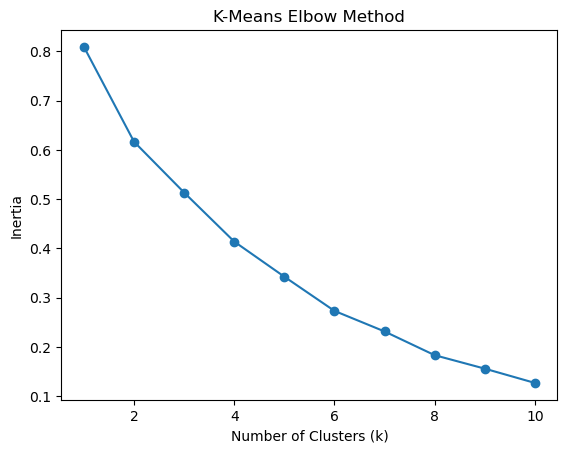

In [42]:
k_range = range(1, 11)

# Plot the line graph
plt.plot(k_range, k_values, marker='o')

# Set labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')

# Display the graph
plt.show()

In [58]:
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0],
      dtype=int32)

In [59]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Gym / Fitness Center,Pizza Place,Pet Store,Bus Line,Gastropub,Office,Soccer Stadium,Coffee Shop,Brewery,Breakfast Spot,2
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Pizza Place,Coffee Shop,Park,Grocery Store,Ice Cream Shop,Skating Rink,Arts & Crafts Store,Café,Bakery,Bank,0
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Hockey Arena,Field,Seafood Restaurant,Sandwich Place,Restaurant,Rental Service,Food & Drink Shop,2
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Pizza Place,Park,Coffee Shop,Mexican Restaurant,Beer Store,Discount Store,Portuguese Restaurant,Seafood Restaurant,Pharmacy,Cosmetics Shop,2
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Shopping Mall,Bank,Brewery,Restaurant,Sandwich Place,0


In [60]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,2,Gym / Fitness Center,Pizza Place,Pet Store,Bus Line,Gastropub,Office,Soccer Stadium,Coffee Shop,Brewery,Breakfast Spot
1,East York,Woodbine Heights,0,Pizza Place,Coffee Shop,Park,Grocery Store,Ice Cream Shop,Skating Rink,Arts & Crafts Store,Café,Bakery,Bank
2,York,Humewood-Cedarvale,2,Pizza Place,Coffee Shop,Convenience Store,Hockey Arena,Field,Seafood Restaurant,Sandwich Place,Restaurant,Rental Service,Food & Drink Shop
3,York,Caledonia-Fairbanks,2,Pizza Place,Park,Coffee Shop,Mexican Restaurant,Beer Store,Discount Store,Portuguese Restaurant,Seafood Restaurant,Pharmacy,Cosmetics Shop
4,East York,Leaside,0,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Shopping Mall,Bank,Brewery,Restaurant,Sandwich Place
5,East York,Thorncliffe Park,0,Indian Restaurant,Afghan Restaurant,Restaurant,Grocery Store,Coffee Shop,Turkish Restaurant,Supermarket,Curling Ice,Fast Food Restaurant,Fried Chicken Joint
6,East York,East Toronto,0,Coffee Shop,Café,Ethiopian Restaurant,Sandwich Place,Pizza Place,Convenience Store,Gastropub,Park,Beer Bar,Beer Store
7,York,Del Ray,3,Fast Food Restaurant,Convenience Store,Sandwich Place,Coffee Shop,Grocery Store,Gas Station,Park,Afghan Restaurant,Paper / Office Supplies Store,Museum
8,Central Toronto,Lawrence Park,0,Café,Trail,Gym / Fitness Center,Park,Coffee Shop,College Quad,Bus Line,Restaurant,Pizza Place,Playground
9,Central Toronto,Roselawn,1,Pharmacy,Skating Rink,Trail,Café,Bank,Modern European Restaurant,Movie Theater,Museum,Music School,Music Store


In [61]:
#retriving 3 most common venue
temp = boroughs_merged[[column for column in boroughs_merged.columns if (column.startswith('1st')) | (column.startswith('2')) | (column.startswith('3')) | (column=='Cluster Labels')]]
temp

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,Gym / Fitness Center,Pizza Place,Pet Store,2
1,Pizza Place,Coffee Shop,Park,0
2,Pizza Place,Coffee Shop,Convenience Store,2
3,Pizza Place,Park,Coffee Shop,2
4,Coffee Shop,Sporting Goods Shop,Grocery Store,0
5,Indian Restaurant,Afghan Restaurant,Restaurant,0
6,Coffee Shop,Café,Ethiopian Restaurant,0
7,Fast Food Restaurant,Convenience Store,Sandwich Place,3
8,Café,Trail,Gym / Fitness Center,0
9,Pharmacy,Skating Rink,Trail,1


In [62]:
#visualizing the resulting the cluster

map_cluster = folium.Map(location=[latitude,longitude], zoom_start=13)

#set the color scheme for the cluster
c = ['red','blue','pink','yellow','orange']

for lat,long,poi,cluster in zip(boroughs_merged['latitude'],
                                boroughs_merged['longitude'],
                                boroughs_merged['Neighbourhood'],
                                boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat,long],
        radius = 7,
        popup = label,
        color = 'black',
        fill= True,
        fill_color = c[cluster-1],
        fill_opacity=0.9).add_to(map_cluster)

map_cluster

### Analysing the clusters

In [63]:
cluster_0 = boroughs_merged[boroughs_merged['Cluster Labels'] == 0]
cluster_1 = boroughs_merged[boroughs_merged['Cluster Labels'] == 1]
cluster_2 = boroughs_merged[boroughs_merged['Cluster Labels'] == 2]
cluster_3 = boroughs_merged[boroughs_merged['Cluster Labels'] == 3]

In [64]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)

(13, 16)
(1, 16)
(4, 16)
(1, 16)


In [50]:
cluster_0.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Gym / Fitness Center,Pizza Place,Pet Store,Bus Line,Gastropub,Office,Soccer Stadium,Coffee Shop,Brewery,Breakfast Spot,0
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Pizza Place,Coffee Shop,Park,Grocery Store,Ice Cream Shop,Skating Rink,Arts & Crafts Store,Café,Bakery,Bank,0
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Hockey Arena,Field,Seafood Restaurant,Sandwich Place,Restaurant,Rental Service,Food & Drink Shop,0
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Pizza Place,Park,Coffee Shop,Mexican Restaurant,Beer Store,Discount Store,Portuguese Restaurant,Seafood Restaurant,Pharmacy,Cosmetics Shop,0
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Shopping Mall,Bank,Brewery,Restaurant,Sandwich Place,0


In [67]:
def cluster_venue(n_most_common_venue,cluster_df):
    cluster = cluster_df.groupby(n_most_common_venue)['Neighbourhood'].count().reset_index().sort_values(by='Neighbourhood',ascending=False)
    bar_plot = plt.bar(cluster.iloc[:,0].values,cluster['Neighbourhood'])
    plt.xticks(rotation=90)
    plt.ylabel('Neighbourhood Counts')
    plt.xlabel(n_most_common_venue)
    plt.show()

    return bar_plot

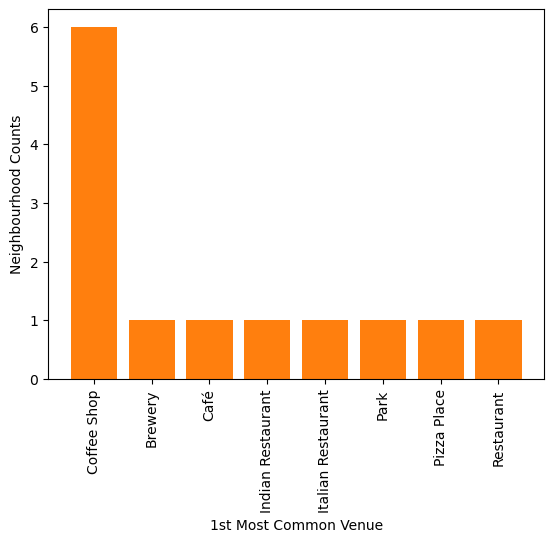

In [68]:
cluster_venue('1st Most Common Venue',cluster_0);

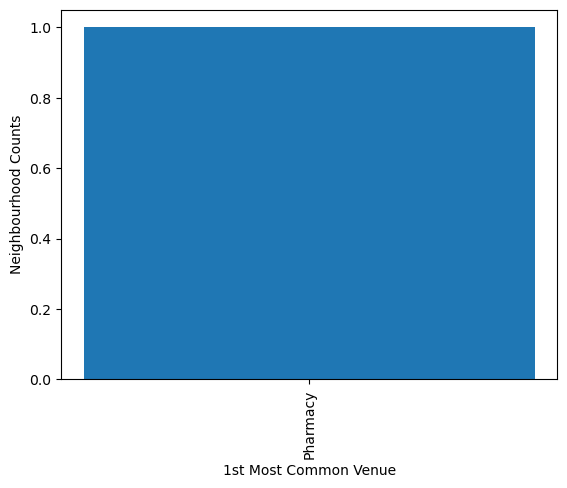

In [69]:
cluster_venue('1st Most Common Venue',cluster_1);

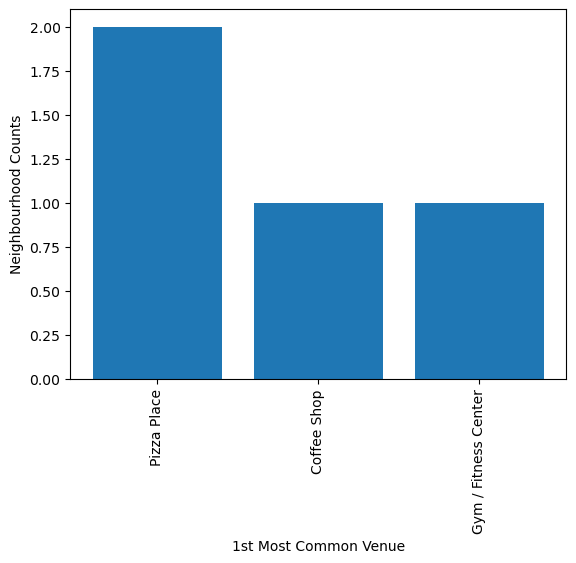

In [70]:
cluster_venue('1st Most Common Venue',cluster_2);

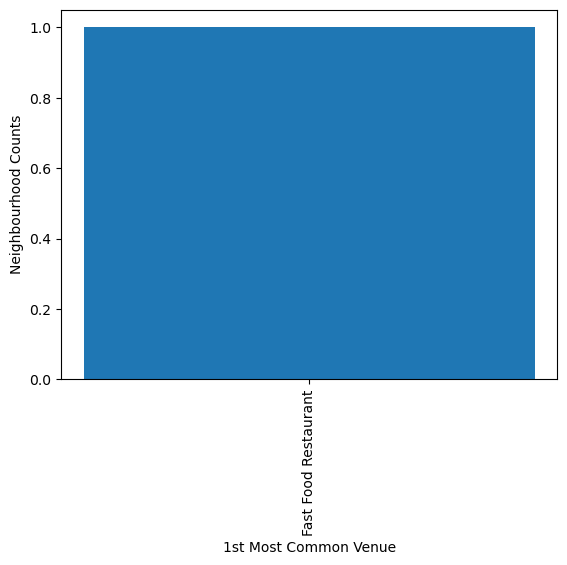

In [71]:
cluster_venue('1st Most Common Venue',cluster_3);

- We can clearly see from the graphs that:

>- <b>Cluster0</b> has most number of coffee shops.
>- <b>Cluster1</b> has more number of pharmacies.
>- <b>Cluster2</b> has more number of Pizza places and fasgt food eating joints along with gym.
>- <b>Cluster3</b> has more number of Fast Food Venues.

The __project's main goal__ is to determine the best location for opening a coffee shop business in Toronto. Discussing what locations can be considered "the best" may vary, but we can equate it as the most conducive ones by considering the following criteria:

1. __Safety__<br>
- The conducive locations are supposed to be safe; hence we analyze the crime statistics for all divisions of Toronto Police Service. We conclude that divisions D55, D54, D53, D33, D13, D12, D11 have the lowest crime rates. These cover Central Toronto, West Toronto, York, and East York.


2. __Demographics and Accessibility__<br>
- Vehicle and foot traffic are important when we choose a location for the new coffee shop. We have shown the busiest main roads in the city where many are located around downtown. Then, we consider focusing on Central Toronto, York, and East York at first. However, this would come to waste if those people are not our target demographic. Hence, we need to understand the target market and discuss it further with the team.


- Accessibility is also another part to consider. Soon, if we have picked a few location candidates, knowing how and why your customers will get to your location are crucial, such as street visibility, parking slot, and location convenience. Thus, further discussion with the team is again needed.


3. __Neighboring businesses__<br>
- Neighboring businesses can affect the profitability both positively and negatively.


- Cluster 1 has the most coffee shops and restaurants in their neighborhoods. Although these businesses can be in different categories, they could all contend with the products you serve. Therefore, cluster 1 is not recommended.


- Cluster 1 and 3 are recommended neighborhoods to inspect further. However, it is also wise to consider other businesses or amenities surrounding the area to complement your offerings. 